In [1]:
import spacy
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import wordcloud
from spacy import displacy
import pandas as pd 
import string 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier

#string.punctuation
#wd = wordcloud.WordCloud()
#cloud = wd.generate(doc.text)
#plt.imshow(cloud) 
#plt.show()
import en_core_web_sm

nlp = en_core_web_sm.load()

In [2]:
sentence = nlp('Je suis Guillaume')

In [3]:
[token.is_alpha for token in sentence]

[True, True, True]

In [4]:
displacy.render(sentence)
#displacy.render(doc, style='dep', jupyter=True,options={'distance': 70})

In [5]:
doc_1 = "Hello World! Don't do this. I am superman wherever you are in the world"
doc_2 = "Do. Or do not. There is no try."
doc_3 = "In my experience there is no such thing as luck."
doc_4 = "I find your lack of faith disturbing."
doc_5 = "I’ve got a bad feeling about this."

df = pd.DataFrame()
df["documents"] = [doc_1,doc_2,doc_3,doc_4,doc_5]

In [6]:
import re

df['documents'] = df['documents'].apply(lambda x: re.sub('[!\"#$%&()*+,-./:;<=>?@\[\]^_`{|}~\\\]+', "", x)) 

In [7]:
df['spacy_object'] = df['documents'].apply(lambda x: x.lower()).apply(lambda x: nlp(x))

In [8]:
df['lemma'] = df['spacy_object'].apply(lambda x: [token.lemma_ for token in x])

In [9]:
df['clean_text'] = df['lemma'].apply(lambda doc: ' '.join(doc))

In [10]:
cv = CountVectorizer(ngram_range=(1, 2))
X = cv.fit_transform(df['clean_text'])


In [11]:
X

<5x68 sparse matrix of type '<class 'numpy.int64'>'
	with 79 stored elements in Compressed Sparse Row format>

In [12]:
pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out()).sum().sort_values(ascending=False)

do           4
be           4
be no        2
there be     2
this         2
            ..
lack         1
lack of      1
luck         1
my           1
your lack    1
Length: 68, dtype: int64

In [13]:
y = [1, 0, 1, 0, 1]

In [15]:
rfc = RandomForestClassifier()
rfc.fit(X, y)

RandomForestClassifier()

In [16]:
rfc.score(X, y)

1.0

In [17]:
tf = TfidfVectorizer()
X = tf.fit_transform(df['clean_text'])

In [18]:
pd.DataFrame(X.toarray(), columns=tf.get_feature_names_out())

,about,as,bad,be,disturb,do,experience,faith,feeling,find,...,the,there,thing,this,try,ve,wherever,world,you,your
0,0.000000,0.000000,0.000000,0.341867,0.000000,0.411843,0.000000,0.000000,0.000000,0.000000,...,0.255234,0.000000,0.000000,0.205922,0.000000,0.000000,0.255234,0.510469,0.255234,0.000000
1,0.000000,0.000000,0.000000,0.253038,0.000000,0.609664,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.304832,0.000000,0.000000,0.377832,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.345007,0.000000,0.231055,0.000000,0.000000,0.345007,0.000000,0.000000,0.000000,...,0.000000,0.278349,0.345007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.408248,0.000000,0.408248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248
4,0.420669,0.000000,0.420669,0.000000,0.000000,0.000000,0.000000,0.000000,0.420669,0.000000,...,0.000000,0.000000,0.000000,0.339393,0.000000,0.420669,0.000000,0.000000,0.000000,0.000000


In [19]:
stop = STOP_WORDS

In [20]:
df

,documents,spacy_object,lemma,clean_text
0,Hello World Don't do this I am superman wherev...,"(hello, world, do, n't, do, this, i, am, super...","[hello, world, do, not, do, this, I, be, super...",hello world do not do this I be superman where...
1,Do Or do not There is no try,"(do, or, do, not, there, is, no, try)","[do, or, do, not, there, be, no, try]",do or do not there be no try
2,In my experience there is no such thing as luck,"(in, my, experience, there, is, no, such, thin...","[in, my, experience, there, be, no, such, thin...",in my experience there be no such thing as luck
3,I find your lack of faith disturbing,"(i, find, your, lack, of, faith, disturbing)","[I, find, your, lack, of, faith, disturb]",I find your lack of faith disturb
4,I’ve got a bad feeling about this,"(i, ’ve, got, a, bad, feeling, about, this)","[I, ’ve, get, a, bad, feeling, about, this]",I ’ve get a bad feeling about this


In [21]:
df['lemma']= df['lemma'].apply(lambda x: [word for word in x if word not in stop])

In [27]:
tf.get_feature_names_out()
tf.get_feature_names_out().shape

(32,)

In [28]:
type(X)

scipy.sparse._csr.csr_matrix

In [29]:
X.toarray()

array([[0.        , 0.        , 0.        , 0.3418669 , 0.        ,
        0.41184301, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.25523439, 0.2059215 , 0.        , 0.        ,
        0.        , 0.        , 0.2059215 , 0.        , 0.        ,
        0.        , 0.25523439, 0.25523439, 0.        , 0.        ,
        0.2059215 , 0.        , 0.        , 0.25523439, 0.51046879,
        0.25523439, 0.        ],
       [0.        , 0.        , 0.        , 0.25303819, 0.        ,
        0.60966423, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30483211, 0.30483211, 0.        , 0.37783155,
        0.        , 0.        , 0.        , 0.30483211, 0.        ,
        0.        , 0.37783155, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.34500687, 0.        , 0.23105512, 0.        ,
        0.        , 0.34500687, 0.        , 0.    

In [31]:
bob = pd.DataFrame(X.toarray().T, tf.get_feature_names_out())
bob.T


,about,as,bad,be,disturb,do,experience,faith,feeling,find,...,the,there,thing,this,try,ve,wherever,world,you,your
0,0.000000,0.000000,0.000000,0.341867,0.000000,0.411843,0.000000,0.000000,0.000000,0.000000,...,0.255234,0.000000,0.000000,0.205922,0.000000,0.000000,0.255234,0.510469,0.255234,0.000000
1,0.000000,0.000000,0.000000,0.253038,0.000000,0.609664,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.304832,0.000000,0.000000,0.377832,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.345007,0.000000,0.231055,0.000000,0.000000,0.345007,0.000000,0.000000,0.000000,...,0.000000,0.278349,0.345007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.408248,0.000000,0.408248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248
4,0.420669,0.000000,0.420669,0.000000,0.000000,0.000000,0.000000,0.000000,0.420669,0.000000,...,0.000000,0.000000,0.000000,0.339393,0.000000,0.420669,0.000000,0.000000,0.000000,0.000000


In [23]:


+
import matplotlib.pyplot as plt
import wordcloud

# Instanciate WordCloud 
wd = wordcloud.WordCloud()
cloud = wd.generate(sentence.text)

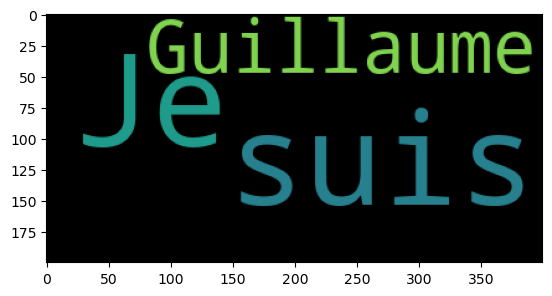

In [24]:
plt.imshow(cloud)
plt.show()